In [1]:
from transformers import GPT2LMHeadModel

In [2]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")
sd_hf = model_hf.state_dict()
for k, v in sd_hf.items():
    print(k, v.shape)
    

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

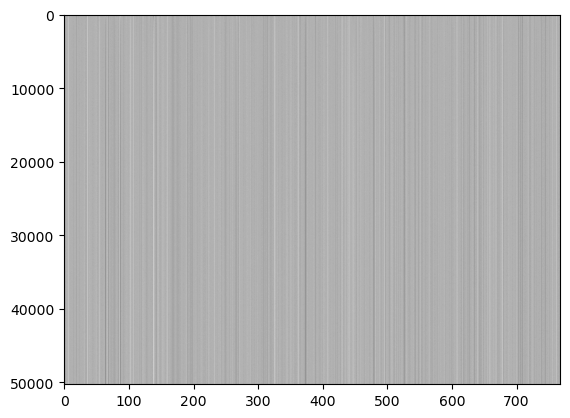

In [3]:
# Display the positional encoding weights in grey
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(sd_hf["transformer.wte.weight"], cmap="Greys", aspect="auto")

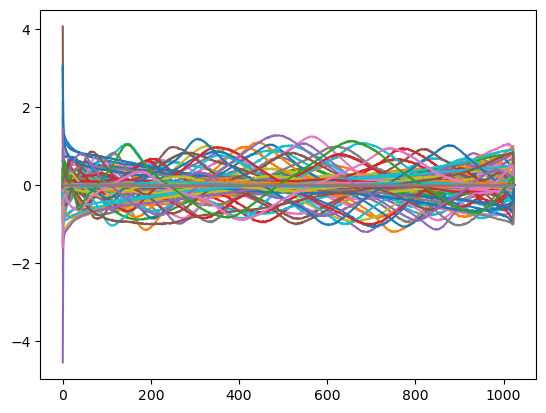

In [4]:
import matplotlib.pyplot as plt

def plot_wpe(num_columns = 768):
    for i in range(num_columns):
        plt.plot(sd_hf["transformer.wpe.weight"][:, i].detach().numpy())
    plt.show()


plot_wpe()

In [5]:
from transformers import pipeline
generator = pipeline('text-generation', model="gpt2")
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=3)


KeyboardInterrupt: 

In [ ]:
with open("/Users/mattia/Desktop/zero_to_hero/tinyshakespeare.txt", "r") as f:
    text = f.read()

print(text[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [ ]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
tokens = tokenizer.encode(text)
print(tokens[:100])
print(tokenizer.decode(tokens[:100]))


[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11, 3285, 502, 2740, 13, 198, 198, 3237, 25, 198, 5248, 461, 11, 2740, 13, 198, 198, 5962, 22307, 25, 198, 1639, 389, 477, 12939, 2138, 284, 4656, 621, 284, 1145, 680, 30, 198, 198, 3237, 25, 198, 4965, 5634, 13, 12939, 13, 198, 198, 5962, 22307, 25, 198, 5962, 11, 345, 760, 327, 1872, 385, 1526, 28599, 318, 4039, 4472, 284, 262, 661, 13, 198, 198, 3237, 25, 198, 1135, 760, 470, 11, 356, 760, 470, 13, 198, 198, 5962, 22307, 25, 198, 5756, 514, 1494, 683, 11, 290, 356]
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we


In [8]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device.type == "cpu")


True


In [5]:
import datasets
print(datasets.Dataset.cleanup_cache_files())

TypeError: Dataset.cleanup_cache_files() missing 1 required positional argument: 'self'